In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
pip install gTTS

In [ ]:
pip install split-folders

In [ ]:
pip install opencv-python

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
import splitfolders


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
input_folder = '/content/drive/MyDrive/One Size'
output = '/content/drive/MyDrive'

In [ ]:
splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.75,.25))

Copying files: 1232 files [00:15, 78.70 files/s]


In [ ]:
training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 917 images belonging to 13 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 314 images belonging to 13 classes.


In [ ]:
# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[224, 224, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=192, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=160, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=96, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))
# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=13, activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 192)               19267776  
_________________________________________________________________
dense_1 (Dense)              (None, 160)               3

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
29/29 [==============================] - 311s 11s/step - loss: 2.6718 - accuracy: 0.0916 - val_loss: 2.4873 - val_accuracy: 0.1338
Epoch 2/50
29/29 [==============================] - 64s 2s/step - loss: 2.4181 - accuracy: 0.1216 - val_loss: 2.2329 - val_accuracy: 0.1561
Epoch 3/50
29/29 [==============================] - 64s 2s/step - loss: 2.1955 - accuracy: 0.1751 - val_loss: 2.0040 - val_accuracy: 0.2771
Epoch 4/50
29/29 [==============================] - 65s 2s/step - loss: 1.9571 - accuracy: 0.2973 - val_loss: 1.8256 - val_accuracy: 0.3694
Epoch 5/50
29/29 [==============================] - 65s 2s/step - loss: 1.7691 - accuracy: 0.3526 - val_loss: 1.5947 - val_accuracy: 0.3949
Epoch 6/50
29/29 [==============================] - 65s 2s/step - loss: 1.6485 - accuracy: 0.4014 - val_loss: 1.4834 - val_accuracy: 0.4299
Epoch 7/50
29/29 [==============================] - 65s 2s/step - loss: 1.4290 - accuracy: 0.4216 - val_loss: 1.1615 - val_accuracy: 0.5669
Epoch 8/50
29/29 [

In [ ]:
from tensorflow.keras.models import load_model

cnn.save('Currency_Recognition.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(cnn)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model_quant = converter.convert()

In [ ]:
import pathlib

tflite_models_dir = pathlib.Path("/content")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

# Save the unquantized/float model:
tflite_model_file = tflite_models_dir/"mnist_model.tflite"
tflite_model_file.write_bytes(tflite_model)
# Save the quantized model:
tflite_model_quant_file = tflite_models_dir/"mnist_model_quant.tflite"
tflite_model_quant_file.write_bytes(tflite_model_quant)

19362928

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('Currency_Recognition.h5')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 224)               22479072  
_________________________________________________________________
dense_16 (Dense)             (None, 192)              

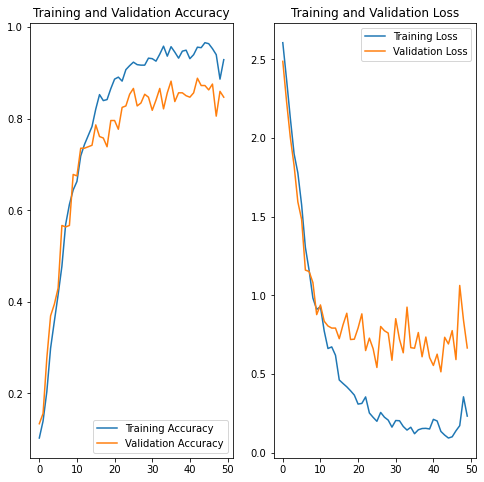

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()